In [127]:
import xlrd
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from numpy import array, cov, corrcoef

In [40]:
justice = xlrd.open_workbook('Justice-Index-Data-Workbook-Summary.xlsx')
file = xlrd.open_workbook('2007-2017-PIT-Counts-by-State.xlsx')
table_homeless = file.sheet_by_name(u'2016')

In [71]:
table_justice = justice.sheet_by_name(u'Attorney Access')
state_name = xlrd.open_workbook('state name.xlsx') 
table_state_name = state_name.sheet_by_name(u'Sheet1')
state = {}
for i in range(len(table_state_name.col_values(1))):
    state[table_state_name.col_values(2)[i]] = table_state_name.col_values(1)[i]
state

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

In [72]:
data = {}
total_pop = {}
for i in range(1,len(table_justice.row_values(0))):
    data[table_justice.row_values(0)[i]] = [table_justice.row_values(4)[i]/10000]
    total_pop[table_justice.row_values(0)[i]] = [table_justice.row_values(1)[i]]
for i in data:
    if i not in state.values():
        print(i)

District of Columbia
Puerto Rico


In [73]:
state['DC']='District of Columbia'
state['PR']='Puerto Rico'

In [74]:
homeless_dic = {}
for i in range(1,len(table_homeless.col_values(0))-2):
    homeless_dic[table_homeless.col_values(0)[i]] = table_homeless.col_values(4)[i]
homeless_dic

{'AK': 442.0,
 'AL': 1218.0,
 'AR': 847.0,
 'AZ': 3244.0,
 'CA': 78390.0,
 'CO': 2939.0,
 'CT': 673.0,
 'DC': 318.0,
 'DE': 51.0,
 'FL': 15361.0,
 'GA': 5366.0,
 'GU': 973.0,
 'HI': 4308.0,
 'IA': 143.0,
 'ID': 738.0,
 'IL': 1854.0,
 'IN': 691.0,
 'KS': 282.0,
 'KY': 706.0,
 'LA': 1141.0,
 'MA': 760.0,
 'MD': 1528.0,
 'ME': 120.0,
 'MI': 960.0,
 'MN': 889.0,
 'MO': 1216.0,
 'MP': '.',
 'MS': 849.0,
 'MT': 630.0,
 'NC': 2309.0,
 'ND': 216.0,
 'NE': 101.0,
 'NH': 143.0,
 'NJ': 1434.0,
 'NM': 454.0,
 'NV': 3927.0,
 'NY': 3591.0,
 'OH': 1138.0,
 'OK': 1020.0,
 'OR': 8002.0,
 'PA': 1675.0,
 'PR': 3097.0,
 'RI': 37.0,
 'SC': 1690.0,
 'SD': 185.0,
 'TN': 3006.0,
 'TX': 6908.0,
 'UT': 236.0,
 'VA': 766.0,
 'VI': 252.0,
 'VT': 156.0,
 'WA': 8466.0,
 'WI': 410.0,
 'WV': 135.0,
 'WY': 366.0}

In [75]:
for i in homeless_dic:
    if i in state.keys():
        data[state[i]].append(homeless_dic[i]/total_pop[state[i]][0])
data

{'Alabama': [2.4937276985565193e-05, 0.0002511662838339853],
 'Alaska': [0.00011347821432394818, 0.0005999467920492119],
 'Arizona': [4.222205741493491e-05, 0.00048191453771560626],
 'Arkansas': [3.328505647093971e-05, 0.0002855342676517992],
 'California': [4.4021585707642005e-05, 0.002020230655241286],
 'Colorado': [2.9648428929751012e-05, 0.0005487441246663005],
 'Connecticut': [0.00014612584013526942, 0.000187117163982198],
 'Delaware': [6.985141063822974e-05, 5.4509658897793324e-05],
 'District of Columbia': [0.0009326166660733991, 0.00048262768006337905],
 'Florida': [4.6096947274051965e-05, 0.0007721696408594312],
 'Georgia': [3.0689272047289546e-05, 0.0005314269308272483],
 'Hawaii': [0.00011495684870999164, 0.003034741022048366],
 'Idaho': [2.865839519518735e-05, 0.00045152416939131117],
 'Illinois': [7.910129176810286e-05, 0.0001439376177159724],
 'Indiana': [3.167461385581878e-05, 0.00010474688317387604],
 'Iowa': [6.003637556941115e-05, 4.6023238195039406e-05],
 'Kansas': [

In [118]:
data1 = copy.deepcopy(data)
data1 = sorted(data1.items(),key = lambda x:x[1][0],reverse = False)
data1

[('South Carolina', [2.4357610149982446e-05, 0.0003497167708022503]),
 ('Alabama', [2.4937276985565193e-05, 0.0002511662838339853]),
 ('Mississippi', [2.5574640789397756e-05, 0.0002835596522336251]),
 ('Idaho', [2.865839519518735e-05, 0.00045152416939131117]),
 ('Colorado', [2.9648428929751012e-05, 0.0005487441246663005]),
 ('Texas', [2.969190028161802e-05, 0.00025626036884428873]),
 ('Georgia', [3.0689272047289546e-05, 0.0005314269308272483]),
 ('Indiana', [3.167461385581878e-05, 0.00010474688317387604]),
 ('Arkansas', [3.328505647093971e-05, 0.0002855342676517992]),
 ('Montana', [3.36019661950505e-05, 0.000615487422074896]),
 ('Tennessee', [3.397579790007141e-05, 0.00045897670487095516]),
 ('Kansas', [3.505741342643638e-05, 9.710673579839815e-05]),
 ('Utah', [3.623694938570542e-05, 8.019295239868674e-05]),
 ('Wisconsin', [3.717795959125877e-05, 7.121067173547702e-05]),
 ('Michigan', [3.987354771876869e-05, 9.68730489793163e-05]),
 ('North Dakota', [4.1426349296286596e-05, 0.000292096

In [128]:
index = np.arange(5)
index

array([0, 1, 2, 3, 4])

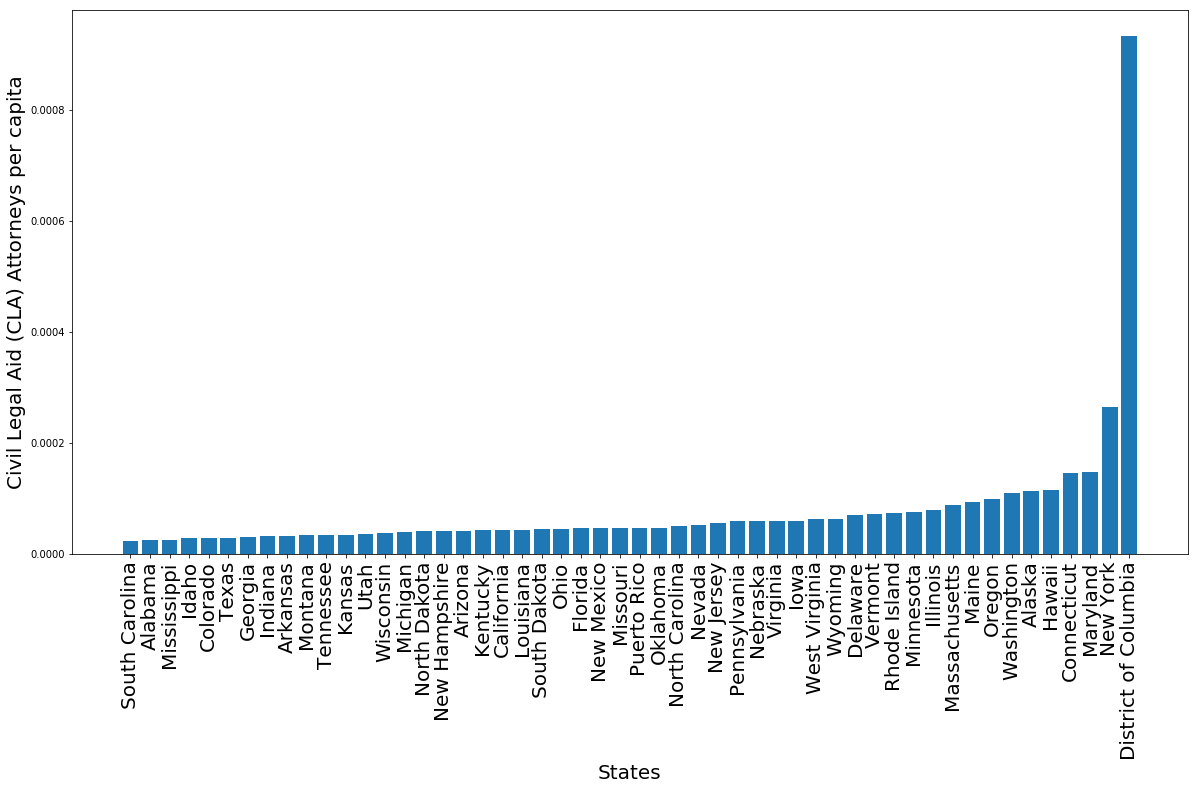

In [155]:
x = []
y = []
name = []
for i in range(len(data1)):
    name.append(data1[i][0])
    x.append(data1[i][1][0])
    y.append(data1[i][1][1])
plt.figure(figsize=(20,10))
plt.bar(range(52),x)
plt.xticks(range(52),name, rotation=90,size=20)
plt.xlabel('States',size = 20)
plt.ylabel('Civil Legal Aid (CLA) Attorneys per capita',size=20)
plt.show()

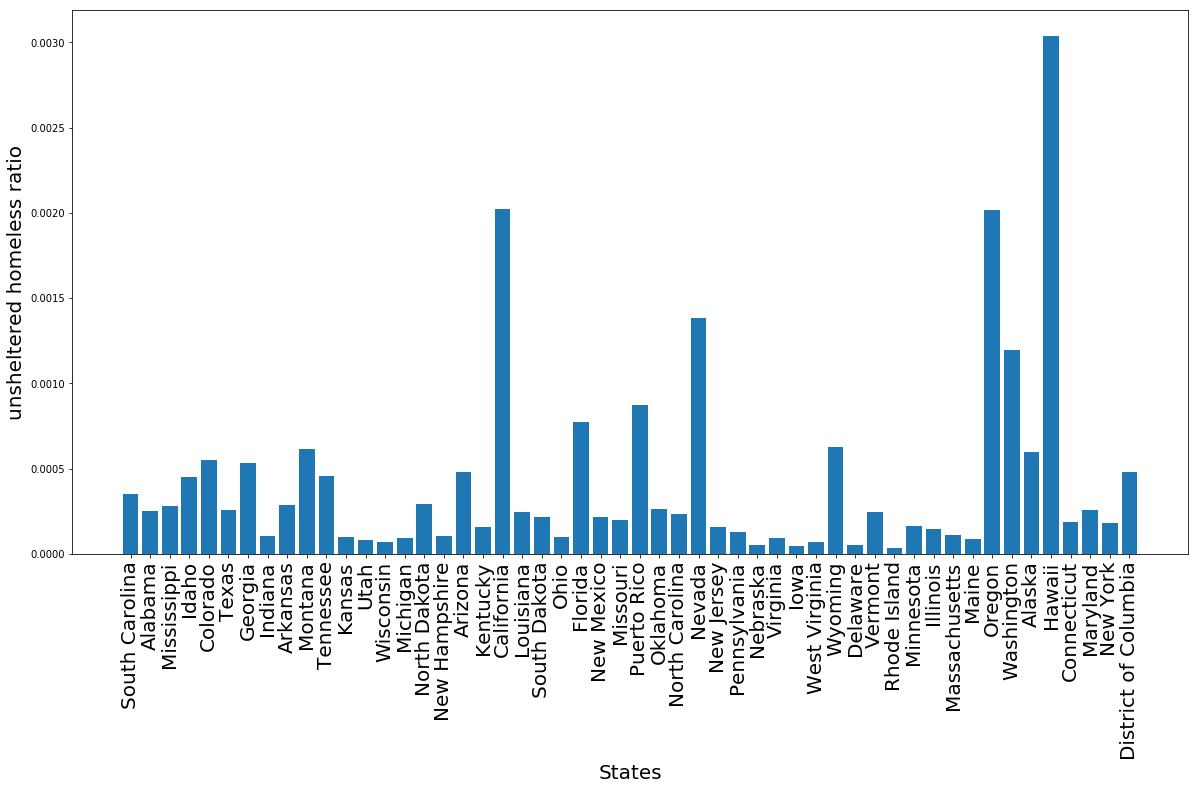

In [154]:
plt.figure(figsize=(20,10))
plt.bar(range(52),y)
plt.xticks(range(52),name, rotation=90,size=20)
plt.xlabel('States',size = 20)
plt.ylabel('unsheltered homeless ratio',size=20)
plt.show()

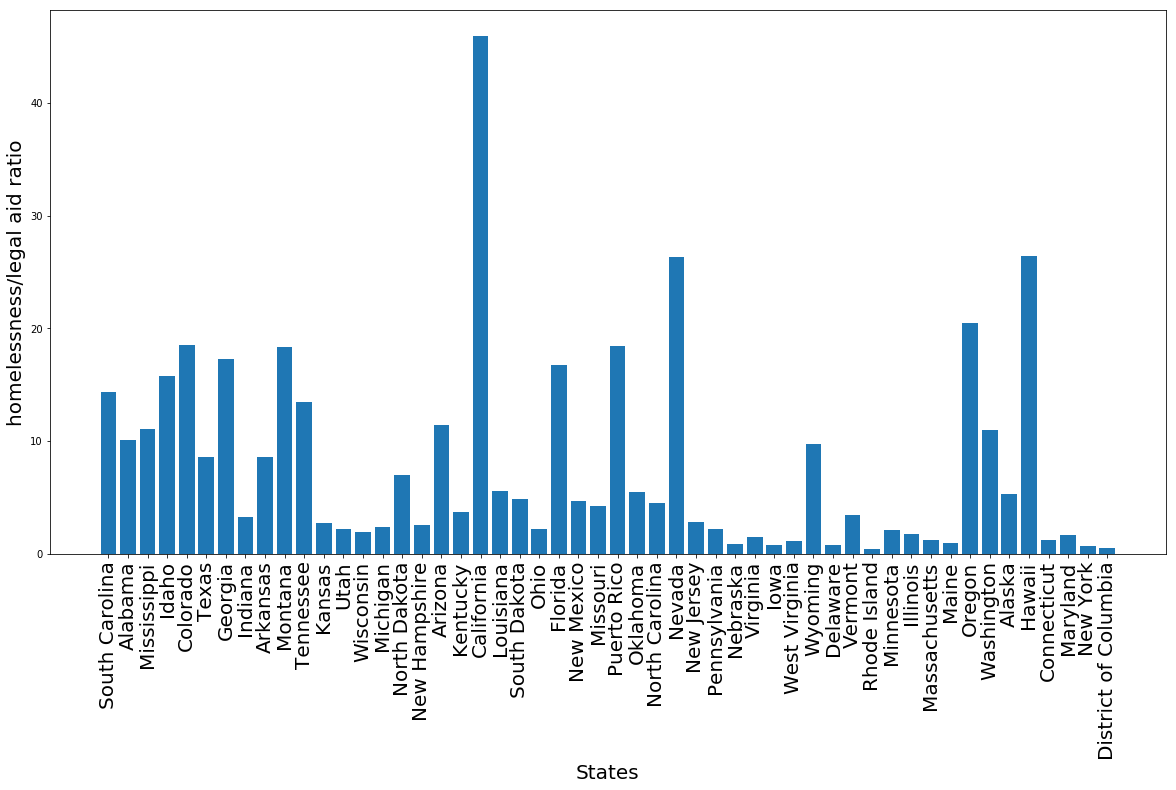

In [153]:
ratio = []
for i in range(len(x)):
    ratio.append(y[i]/x[i])
plt.figure(figsize=(20,10))
plt.bar(range(52),ratio)
plt.xticks(range(52),name, rotation=90,size=20)
plt.xlabel('States',size = 20)
plt.ylabel('homelessness/legal aid ratio',size=20)
plt.show()

In [141]:
from scipy.stats.stats import pearsonr
pearsonr(x,y)

(0.058480526551984005, 0.68047831908526801)